<center><b>ON HOW TO BEST COMBINE MULTIPLE APPROACHES TO RECOMMENDATION</b></center>

<i><center>Insight Demo</center></i>

<u><b>Problem</b></u>

- Content recommenders and collaborative recommenders have different strengths/weaknesses, affecting how relevant their recommendations are.
    - For example, for movies that have lots of user ratings, by-item collaborative filters are quite accurate;
    - but for movies that have been rated few times, the collaborative filter performs poorly.


- Data scientists turn to <i>hybrid recommenders</i>—in which multiple simple recommenders are combined—to surmount weaknesses displayed by any component recommender in isolation.


- The data scientists on Towards Data Science often use a weighted average between the collaborative and content-based approaches, without comparing the hybrid to other possibilities.


- <u>Question</u>: Amongst a variety of choices for hybrid algorithm, which one works best? In other words, <i>how</i> should two recommenders be combined, given a dataset?
            
            
<u><b>This demo</b></u> 

- Compares performance of four movie recommenders against the MovieLens dataset: content, collaborative, hybrid weighted average, and hybrid content-to-collaborative switch once seed has enough ratings


- Discovers that content recommendation performs better than collaborative on MAP@10 accuracy metric for less-rated movie seeds, while collaborative performs better for often-rated seeds


- In turn discovers that averaging—used by many data scientists on TDS—performs only half as well as the uncommon switch algorithm
    - This calls into question the use of averaging if the goal is accuracy

<center><b>LOAD THE DATA</b></center>

- Start with the MovieLens datasets (100K user ratings of movies)
- Merge userID/movieID/user ratings/titles
- Gather genre and tags, dump them into metadata column, merge in metadata column

In [2]:
from simple_recommender import *
import pandas as pd 
from pandas import DataFrame

pd.set_option('display.max_colwidth', -1)
movies_data: DataFrame = load_movie_data()
movies_data.head(6)

,userId,movieId,rating,title,metadata
0,1,1,4.0,Toy Story (1995),pixar pixar fun Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),pixar pixar fun Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),pixar pixar fun Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),pixar pixar fun Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),pixar pixar fun Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,Toy Story (1995),pixar pixar fun Adventure|Animation|Children|Comedy|Fantasy


In [3]:
movies_data.tail(6)

,userId,movieId,rating,title,metadata
100830,610,158721,3.5,Gen-X Cops (1999),Action|Comedy|Thriller
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller
100835,610,163981,3.5,31 (2016),Horror


<center><b>THE COLLABORATIVE RECOMMENDER</b></center>

- <u>Item-to-item collaborative filtering recommender</u>:
    - When user rates some movie highly, it recommends other movies having <i>the most similar set of user ratings.</i>
    - “often quite accurate, and can scale to large datasets” ([[1](https://www.cs.umd.edu/~samir/498/Amazon-Recommendations.pdf)])

- Needs <i>user ratings</i> (1-5). We'll hold out the first 10% for evaluation, but take the last 90%.
- What about missing values? For now, I filled in with 2.5; for the future, I plan to estimate them.

In [4]:
newRec: Recommender = Recommender(movies_data, "userId", "movieId", "title", "rating", "metadata")
recommendation_count: int = 10
newRec._item_matrix.head(6)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
62,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,4.5,2.5,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
63,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
64,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
65,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
66,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
67,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5


- Performs well on <u>Toy Story</u>, which has many ratings.
- We see ordered list of recommendations, and their similarity scores (based on cosine similarity) 

In [5]:
newRec._ratings['Number_of_ratings']['Toy Story (1995)']

215

In [6]:
toy_story_recs = newRec.recommend_items("Toy Story (1995)", "cos", "collab")
newRec.prune_recommended(toy_story_recs, 10, 50)["Similarity"]

title
Toy Story 2 (1999)                     0.967995
Truth About Cats & Dogs, The (1996)    0.963986
Splash (1984)                          0.962834
Honey, I Shrunk the Kids (1989)        0.962511
Hook (1991)                            0.962017
Toy Story 3 (2010)                     0.961997
Space Jam (1996)                       0.961835
Dragonheart (1996)                     0.961640
Bug's Life, A (1998)                   0.961512
Little Mermaid, The (1989)             0.961188
Name: Similarity, dtype: float64

- But recommender performs poorly on <u>Children of the Damned</u> (horror), which has <i>few ratings</i>.
- This is the <b>cold-start problem</b> for collaborative approach: seed movie has no user ratings => can't tell whether it's similar to other movies in terms of user ratings!
- E.g., if user likes a <i>new</i> movie, she either won’t receive recommendations in return, or will receive poor recommendations.

In [7]:
newRec._ratings['Number_of_ratings']['Children of the Damned (1963)']

3

In [8]:
damned_recs = newRec.recommend_items("Children of the Damned (1963)", "cos", "collab")
newRec.prune_recommended(damned_recs, 10, 50)["Similarity"]

title
Wild Wild West (1999)                                  0.993708
Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002)    0.993474
What Women Want (2000)                                 0.993380
City Slickers II: The Legend of Curly's Gold (1994)    0.993213
Hook (1991)                                            0.993076
Sabrina (1995)                                         0.993019
Splash (1984)                                          0.992982
Honey, I Shrunk the Kids (1989)                        0.992865
Beverly Hills Cop III (1994)                           0.992772
Arachnophobia (1990)                                   0.992558
Name: Similarity, dtype: float64

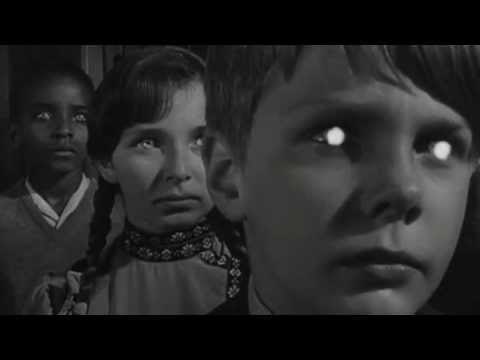

In [9]:
from IPython.display import Image
Image("https://i.ytimg.com/vi/KKBohAgOGXo/hqdefault.jpg")

- Evaluate recommender using <u>average precision at 10 (AP@10)</u>:
    - Suppose user rates movie highly. Feed that movie into recommender, get back list of recs. Precision: how many of these recs are also liked by that user?
    - AP@10: proportion of movies on that list that is liked by that user, but with higher-ranked movies weighted more heavily. 
    - Unlike other metrics, AP@10 sensitive to <i>order of recommendations</i>.


- For every movie that a held-out user likes, feed that movie into recommender, get list of recs,  and write down the list's AP@10 score.
- But how do we know if a held-out user <i>likes</i> a movie? We'll say that if she rates it a 4 or 5, she likes it (1); else, she doesn't (0).

In [10]:
newRec._held_out_matrix_raw.loc[1, :]

title
'71 (2014)                                  NaN 
'Hellboy': The Seeds of Creation (2004)     NaN 
'Round Midnight (1986)                      NaN 
'Salem's Lot (2004)                         NaN 
'Til There Was You (1997)                   NaN 
                                             .. 
eXistenZ (1999)                             NaN 
xXx (2002)                                  NaN 
xXx: State of the Union (2005)              NaN 
¡Three Amigos! (1986)                        4.0
À nous la liberté (Freedom for Us) (1931)   NaN 
Name: 1, Length: 9719, dtype: float64

In [11]:
newRec._held_out_matrix.loc[1,:]

title
'71 (2014)                                   0
'Hellboy': The Seeds of Creation (2004)      0
'Round Midnight (1986)                       0
'Salem's Lot (2004)                          0
'Til There Was You (1997)                    0
                                            ..
eXistenZ (1999)                              0
xXx (2002)                                   0
xXx: State of the Union (2005)               0
¡Three Amigos! (1986)                        1
À nous la liberté (Freedom for Us) (1931)    0
Name: 1, Length: 9719, dtype: int64

- So every time we see a 1, we get a list of recs from collaborative recommender, and we calculate/write down AP@10 score. Let's plot all these scores against how many ratings the seed movie has.

Text(0, 0.5, 'Average precision @10')

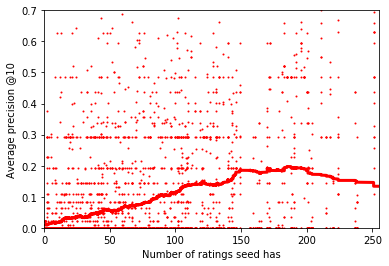

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#loads AP@10 data for collaborative recommender
scatterpoints = pd.read_csv("scatterpointscollab0.csv")

#scattergram of AP@10's as a function of number of seed ratings
plt.plot('ratingcount', 'AP', 'o', color='red', markersize = 1, data = scatterpoints);

#plots moving average ontop
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

y_av = movingaverage(scatterpoints['AP'], 600)
plt.plot('ratingcount', y_av, "r", color = 'red', linewidth = 3, data = scatterpoints)
plt.xlim(0, 255)
plt.ylim(0, 0.7)
plt.xlabel('Number of ratings seed has')
plt.ylabel('Average precision @10')


- Mean AP low if seed has few ratings, but increases as number of seed ratings increases.

<center><b>THE CONTENT RECOMMENDER</b></center>

- <u>Content-based</u>: recommend similar movies based on metadata (genre, tags, director, etc.)

- Data for content recommender: 
    - Run TF-IDF (term frequency-inverse document frequency) on metadata: maps every movie's metadata to vectors of numbers. 
    - For <u>Toy Story</u>, "pixar" corresponds to a positive number, but "Horror" corresponds to zero. Rare occurrences get very positive numbers; common occurrences, low positive numbers.
    - These numbers reflect how <i>important</i> a metadata term is for describing a movie.
    - Every movie gets a vector with dimensionality [#words in metadata column].   
    
    
- Problem: there are ~23000 words in metadata column, so every movie will have vector with huge dimensionality!
    - Solution: Reduce dimensionality of these vectors to 200 rows by applying singular value decomposition algorithm ([[8](https://blog.codecentric.de/en/2019/07/recommender-system-movie-lens-dataset/)]).

In [13]:
newRec._cont_matrix.head(6)

,title,metadata
0,Toy Story (1995),pixar pixar fun Adventure|Animation|Children|Comedy|Fantasy
215,Grumpier Old Men (1995),moldy old Comedy|Romance
267,Heat (1995),Action|Crime|Thriller
369,Seven (a.k.a. Se7en) (1995),mystery twist ending serial killer Mystery|Thriller
572,"Usual Suspects, The (1995)",mindfuck suspense thriller tricky twist ending heist Crime|Mystery|Thriller
776,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller


In [14]:
newRec._latent_cont_matrix.head(6)

,Toy Story (1995),Grumpier Old Men (1995),Heat (1995),Seven (a.k.a. Se7en) (1995),"Usual Suspects, The (1995)",From Dusk Till Dawn (1996),Bottle Rocket (1996),Braveheart (1995),Rob Roy (1995),Canadian Bacon (1995),...,Return of the One-Armed Swordsman (1969),Hitchcock/Truffaut (2015),He Never Died (2015),Southbound (2016),Gen-X Cops (1999),Bloodmoon (1997),Sympathy for the Underdog (1971),Hazard (2005),Blair Witch (2016),31 (2016)
0,0.101041,0.146915,0.244496,0.042248,0.068142,0.419460,0.317287,0.050366,0.411009,0.310102,...,0.156643,0.009092,0.624727,0.064597,0.481378,0.203776,0.439005,0.462212,0.142528,0.064597
1,0.084264,0.106836,-0.179554,-0.046863,-0.067885,0.134922,0.167761,-0.044492,-0.236327,0.263933,...,-0.034085,0.005976,0.030132,-0.020674,0.187126,-0.160241,-0.360421,-0.431915,-0.125380,-0.020674
2,0.068860,-0.043149,0.730269,0.130423,0.202061,0.671024,0.124079,0.024549,0.051466,-0.007577,...,0.485476,0.000596,0.093403,0.302713,0.614776,0.714630,0.368591,0.519176,0.564362,0.302713
3,0.076040,0.131018,-0.167201,-0.030973,-0.077590,-0.099175,0.042271,0.003962,0.395002,-0.078038,...,0.253571,-0.013916,-0.173235,-0.011335,-0.116882,-0.014814,-0.159518,-0.075085,-0.093620,-0.011335
4,-0.160428,0.086778,0.193868,0.116893,0.162759,0.274026,0.091435,-0.038683,-0.009004,-0.064819,...,-0.476248,-0.008314,0.208896,0.368999,0.059923,0.081799,-0.095028,0.006962,0.545989,0.368999
5,0.009718,-0.035771,-0.529426,0.008103,-0.081404,0.215299,-0.266237,-0.023758,-0.234543,0.001080,...,-0.271383,0.000138,0.561793,0.622442,-0.211932,-0.267608,-0.508977,-0.188587,0.466292,0.622442


- Seems to do well on <i>Toy Story</i>, and even does alright with <i>Children of the Damned</i>:

In [15]:
toy_story_recs = newRec.recommend_items("Toy Story (1995)", "cos", "content")
newRec.prune_recommended(toy_story_recs, 10, 50)[['Title','Similarity']]

,Title,Similarity
1600,"Bug's Life, A (1998)",0.896521
735,Toy Story 2 (1999),0.769478
915,Up (2009),0.541109
751,"Monsters, Inc. (2001)",0.438933
744,Shrek (2001),0.403696
755,Ice Age (2002),0.384312
39,Space Jam (1996),0.367260
194,Who Framed Roger Rabbit? (1988),0.364952
1133,Toy Story 3 (2010),0.359626
118,"Goonies, The (1985)",0.345373


In [16]:
damned_recs = newRec.recommend_items("Children of the Damned (1963)", "cos", "content")
newRec.prune_recommended(damned_recs, 10, 50)[['Title','Similarity']]

,Title,Similarity
1026,Johnny Mnemonic (1995),0.441900
587,Outbreak (1995),0.423086
1060,District 9 (2009),0.413116
177,"Rocky Horror Picture Show, The (1975)",0.403246
726,Contact (1997),0.400743
71,"Clockwork Orange, A (1971)",0.400634
198,Spaceballs (1987),0.396412
634,Coneheads (1993),0.396412
187,Total Recall (1990),0.393956
1048,"I, Robot (2004)",0.393956


- Let's plot its performance against that of the collaborative recommender.

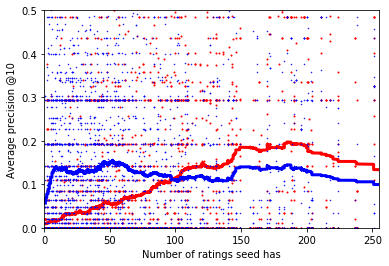

In [17]:
#loads AP@10 data for collaborative recommender
scatterpoints = pd.read_csv("scatterpointscollab0.csv")

#scattergram of AP@10's as a function of number of seed ratings
plt.plot('ratingcount', 'AP', 'o', color='red', markersize = 1, data = scatterpoints);

#plots moving average ontop
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

y_av = movingaverage(scatterpoints['AP'], 600)
plt.plot('ratingcount', y_av, "r", color = 'red', linewidth = 3, data = scatterpoints)
plt.xlim(0, 255)
plt.ylim(0, 0.5)
plt.xlabel('Number of ratings seed has')
plt.ylabel('Average precision @10')

#loads AP@10 data for collaborative recommender
scatterpoints2 = pd.read_csv("scatterpointscontent0.csv")

#scattergram of AP@10's as a function of number of seed ratings
plt.plot('ratingcount', 'AP', 'o', color='blue', markersize = 0.5, data = scatterpoints2)

y_av2 = movingaverage(scatterpoints2['AP'], 600)
plt.plot('ratingcount', y_av2, "r", color = 'blue', linewidth = 3, data = scatterpoints2)

- <i>Mediocre</i> performance across seeds, mostly insensitive to ratings count.
- Notice the <b>switch</b>! Content > collab, then collab > content after 100 ratings.

- For future: better content recommendation. Get movie descriptions, look into more sophisticated NLP techniques.
- I already got a list of directors separate from MovieLens (but so far no improvement to content recommender):

In [18]:
new_movie_data = pd.read_csv("full_movie_dataset2.csv") 
new_movie_data.head(1)

,userId,movieId,rating,title,metadata
0,1,1,4.0,Toy Story (1995),pixar pixar fun Adventure|Animation|Children|Comedy|Fantasy John Lasseter


<center><b>THE HYBRID RECOMMENDERS</b></center>
    
- We consider two hybrid recommenders:
    - <u>Hybrid averaging</u>: based on weighted average of similarity scores given by collaborative/content-based
        - Popular on data science blogs today (e.g., [[2](https://towardsdatascience.com/creating-a-hybrid-content-collaborative-movie-recommender-using-deep-learning-cc8b431618af)], [[3](https://www.kaggle.com/gspmoreira/recommender-systems-in-python-101)], [[4](https://blog.codecentric.de/en/2019/07/recommender-system-movie-lens-dataset/)]); focus of research paper ([[5](https://iopscience.iop.org/article/10.1088/1742-6596/930/1/012050/pdf)])
    - <u>Hybrid switching</u>: switch from content to collaborative once seed movie has enough ratings
        - Less well-known: there's a research presentation ([[6](https://www.math.uci.edu/icamp/courses/math77b/lecture_12w/pdfs/Chapter%2005%20-%20Hybrid%20recommendation%20approaches.pdf)]) and paper ([[7](https://www.researchgate.net/publication/45692369_Building_Switching_Hybrid_RecommenderSystem_Using_Machine_Learning_Classifiers_andCollaborative_Filtering)]), but nearly no discussion on blogs, as far as I'm aware


- Let's plot their performance curves — switchpoint of 100 and 50-50 weight (simple averaging). 
- The switch recommender (in transparent purple) <i>clearly</i> does the best: in fact, averaging (in black) does <i>poorly.</i>

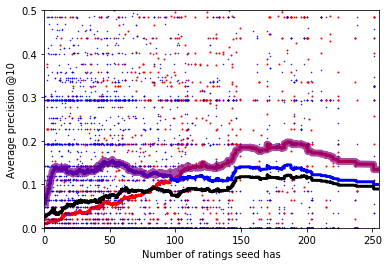

In [19]:
#loads AP@10 data for collaborative recommender
scatterpoints = pd.read_csv("scatterpointscollab0.csv")

#scatterplot of AP@10's as a function of number of seed ratings
plt.plot('ratingcount', 'AP', 'o', color='red', markersize = 1, data = scatterpoints);

#plots moving average ontop
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

y_av = movingaverage(scatterpoints['AP'], 600)
plt.plot('ratingcount', y_av, "r", color = 'red', linewidth = 3, data = scatterpoints)
plt.xlim(0, 255)
plt.ylim(0, 0.5)
plt.xlabel('Number of ratings seed has')
plt.ylabel('Average precision @10')

#complete plot for content recommender
scatterpoints2 = pd.read_csv("scatterpointscontent0.csv")
plt.plot('ratingcount', 'AP', 'o', color='blue', markersize = 0.5, data = scatterpoints2)
y_av2 = movingaverage(scatterpoints2['AP'], 600)
plt.plot('ratingcount', y_av2, "r", color = 'blue', linewidth = 3, data = scatterpoints2)

#complete plot for averaging recommender
scatterpoints3 = pd.read_csv("scatterpointsaverage0.csv")
plt.plot('ratingcount', 'AP', 'o', markersize = 0.5, data = scatterpoints3, alpha = 0)
y_av3 = movingaverage(scatterpoints3['AP'], 600)
plt.plot('ratingcount', y_av3, "r", color = 'black', linewidth = 3, data = scatterpoints3)

#complete plot for switch recommender
scatterpoints4 = pd.read_csv("scatterpointsswitch0.csv")
plt.plot('ratingcount', 'AP', 'o', markersize = 0.5, data = scatterpoints4, alpha = 0)
y_av4 = movingaverage(scatterpoints4['AP'], 600)
plt.plot('ratingcount', y_av4, "r", color = 'purple', linewidth = 7, data = scatterpoints4, alpha = 0.7)

- Here are just the performance curves, up close:

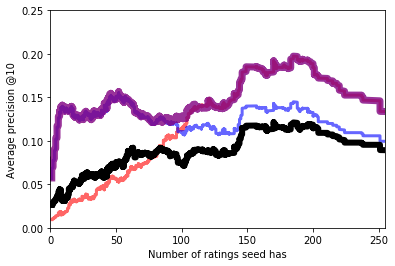

In [20]:
#loads AP@10 data for collaborative recommender
scatterpoints = pd.read_csv("scatterpointscollab0.csv")

#scatterplot of AP@10's as a function of number of seed ratings
plt.plot('ratingcount', 'AP', 'o', color='red', markersize = 1, data = scatterpoints, alpha = 0);

#plots moving average ontop
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

y_av = movingaverage(scatterpoints['AP'], 600)
plt.plot('ratingcount', y_av, "r", linewidth = 3, data = scatterpoints, alpha = 0.6)
plt.xlim(0, 255)
plt.ylim(0, 0.25)
plt.xlabel('Number of ratings seed has')
plt.ylabel('Average precision @10')

#complete plot for content recommender
scatterpoints2 = pd.read_csv("scatterpointscontent0.csv")
plt.plot('ratingcount', 'AP', 'o', color='blue', markersize = 0.5, data = scatterpoints2, alpha = 0)
y_av2 = movingaverage(scatterpoints2['AP'], 600)
plt.plot('ratingcount', y_av2, "r", color = 'blue', linewidth = 3, data = scatterpoints2, alpha = 0.6)

#complete plot for averaging recommender
scatterpoints3 = pd.read_csv("scatterpointsaverage0.csv")
plt.plot('ratingcount', 'AP', 'o', markersize = 0.5, data = scatterpoints3, alpha = 0)
y_av3 = movingaverage(scatterpoints3['AP'], 600)
plt.plot('ratingcount', y_av3, "r", color = 'black', linewidth = 6, data = scatterpoints3)

#complete plot for switch recommender
scatterpoints4 = pd.read_csv("scatterpointsswitch0.csv")
plt.plot('ratingcount', 'AP', 'o', markersize = 0.5, data = scatterpoints4, alpha = 0)
y_av4 = movingaverage(scatterpoints4['AP'], 600)
plt.plot('ratingcount', y_av4, "r", color = 'purple', linewidth = 7, data = scatterpoints4, alpha = 0.8)

- Switch recommender is also <i>faster</i> than averaging recommender: switch recommender only computes one list, but averaging computes three. 


- But does it perform overall better than the averaging recommender, for <i>all</i> possible averaging-weights? 
- MAP@10 helps to assess this: it's the mean over all AP@10's for a recommender. 
- MAP@10 of switching recommender with switchpoint 100: <b>0.14</b>.
- Below we see a bunch of content weights (we expect the best weight to be between 0.5/1, since content has a higher MAP than collaborative). The switch recommender does better than <i>any of these.</i>

In [21]:
MAP_by_content_weight = pd.read_csv("MAP_by_content_weight.csv") 
MAP_by_content_weight

,Content weight,MAP@10
0,0.500,0.074127
1,0.625,0.074590
2,0.750,0.074422
3,0.875,0.074662


- <b>Takeaway</b>: Data scientists should think carefully about <i>how</i> they combine recommenders.

- For the future:
    - What about other metrics, such as <i>coverage</i>? I can imagine choosing other approaches in light of other metrics.
    - How can we make the switch approach <i>scalable</i>? Need to ensure content works quickly.